# TP 1 - Redes Neuronales
Intregrantes: 
- Ivan Charabora LU: 234/20
- Alejandro Schwartzmann LU: 390/20
- Paula Pérez Bianchi LU: 7/20

## Introducción + código de los métodos

In [2]:
#Si los imports de abajo no funciona descomentar la línea correspondiente
#!pip install numpy
#!pip install matplotlib
#!pip install requests

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as mpl, cm
import requests

import random # Para poder setear una semilla global y obtener resultados reproducibles
random.seed(1221)

In [4]:
def oja_generalizada(X, M, lr, epochs=100, decay_rate= 1e-7):
    
    N = X.shape[1]
    W = np.random.normal(size = (N, M))
    Y = np.dot( X, W)
    orthogonality_values = np.zeros(epochs)
    for epoch in range(epochs):  
        for x in X: 
            deltaW = np.zeros(W.shape)
            x = x.reshape(1, N)
            Y = x@W
            Z = np.dot( Y, W.T)
            dif= x-Z
            dW = np.outer(dif, Y)
            W += lr*dW

        lr *= (1.0 / (1.0 + decay_rate * epoch))
        orthogonality_values[epoch] = np.sum(np.abs(np.dot(W.T, W) - np.identity(M))) / 2

    return W, orthogonality_values

def sanger(X, M, lr, epochs=100, decay_rate= 1e-7):
    
    N = X.shape[1]
    W = np.random.normal(size = (N, M))
    Y = np.dot( X, W)
    orthogonality_values = np.zeros(epochs)
    for epoch in range(epochs):  
        for x in X: 
            deltaW = np.zeros(W.shape)
            x = x.reshape(1, N)
            Y = x@W
            D = np.triu( np.ones((M,M)))
            Z = np.dot( W, Y.T*D)
            
            dW = (x.T - Z) * Y
            W += lr*dW

        lr *= (1.0 / (1.0 + decay_rate * epoch))
        orthogonality_values[epoch] = np.sum(np.abs(np.dot(W.T, W) - np.identity(M))) / 2

    return W, orthogonality_values


### Cross Validation
Función para separación de folds mezclando los datos  

In [5]:
def split_folds(number_of_folds, x_size):
    x_idx = np.arange(x_size)
    np.random.shuffle(x_idx)
    idx_splits = []
    fold_size = (x_size//number_of_folds)
    
    for idx_fold in range(number_of_folds):
       if idx_fold == number_of_folds-1:
          test = x_idx[idx_fold*fold_size:]
       else:
          test = x_idx[idx_fold*fold_size: idx_fold*fold_size + fold_size]
       
       training = x_idx[~np.isin(x_idx, test)]
       idx_splits.append((training,  test))
    
    return idx_splits

# Experimentación

### Problema 1 - Descripciones en texto de compañias brasileñas 

El objetivo es poder usar los textos representados en el formato Bag of Words para poder clasificar las empresas segun su actividad principal. 


In [6]:
r = requests.get("https://git.exactas.uba.ar/redes-neuronales/clases/-/raw/master/practicas/datos/tp2_training_dataset.csv")
data_with_labels = np.loadtxt(r.iter_lines(), delimiter=",")

data = data_with_labels[::,1:]


#### Separamos el training set 

In [7]:
training_data_len = 800
training_idx = np.random.choice(899, training_data_len, replace =False)

training = data[training_idx]
evaluation = data[~np.isin(np.arange(900),training_idx)] #hand-out set 

print("training data shape ", training.shape)
print("eval data shape ", evaluation.shape)

#Normalizamos 
training = (training- np.mean(training, axis = 0))/ np.std(training)

training data shape  (800, 856)
eval data shape  (100, 856)


In [54]:
W_oja, o_oja  = oja_generalizada(training, 9, 0.000001, 2000)

Y = training@W_oja

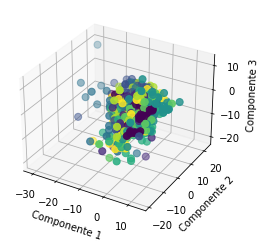

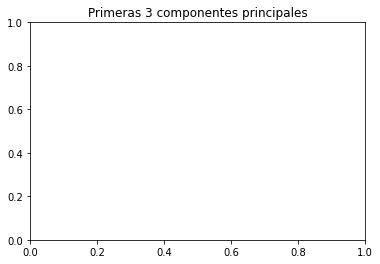

In [53]:

# Graficar los resultados en R^3
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
c = np.round(data_with_labels[training_idx,0])
fig = plt.figure()
ax.scatter(Y[:, 6], Y[:, 7], Y[:, 8], c = c, cmap='viridis', s=50)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
plt.title('Primeras 3 componentes principales')
plt.savefig('oja1-3.png')
plt.show()

In [113]:
W_sanger, o_sanger = sanger(training, 9, 0.000001, 100)